In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
df= pd.read_excel('weight-height.xlsx')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'height')

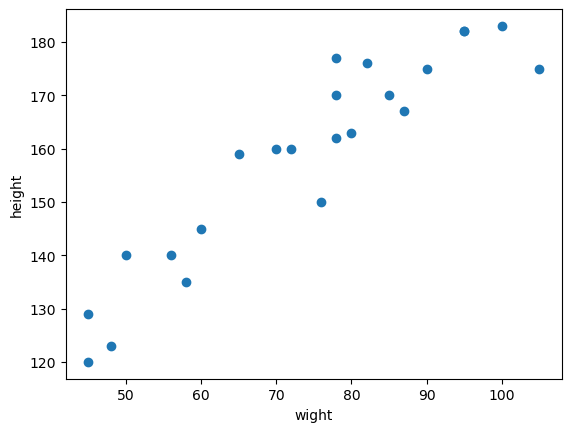

In [3]:
## scatter plot to check the relation between features
plt.scatter(x=df['Weight'],y=df['Height'])
plt.xlabel("wight")
plt.ylabel("height")

In [4]:
## correlation between features
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


observations: 
1. weight vs height are higly co-related
2. weight vs weight ans height vs height no variance

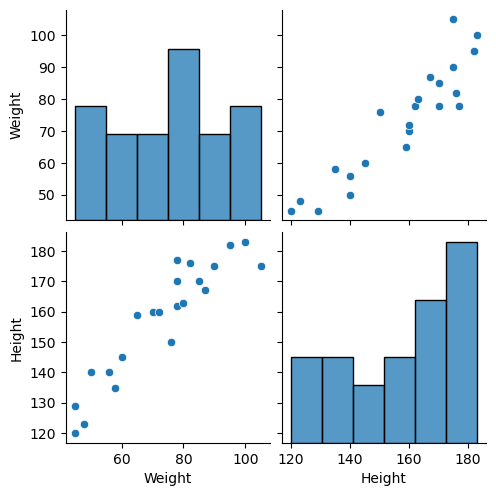

In [5]:
## seaborn for visulaizations
sns.pairplot(df)

 as there is linear correlations between feature we can use  simple linear regression

In [6]:
## step-1
## deviding into dependent and  independent feature

df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [7]:
## idependent feature should be in data frame or a 2 dimension array  
X=df[['Weight']] ## independant
y=df['Height']  ## dependent, we can take dependent feature as series(1-d array) as it only one feature


In [8]:
## train ans test split

from sklearn.model_selection import train_test_split


In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [10]:
X_train.shape

(17, 1)

## Standarizations
apply z-score into feature values to overcome the error of units of data as it may create problem in finding the global minima in gradiant decent

In [11]:
from sklearn.preprocessing import StandardScaler


In [12]:
## for train data
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In [13]:
X_test=scaler.transform(X_test)

we use fit_transform for train data but not test data as in test data as we want to use the same value of mean and SD of train data into test data

## apply machine learning algo - simple linear regresssion

In [14]:
from sklearn.linear_model import LinearRegression
regession=LinearRegression()

In [15]:
regession.fit(X_train,y_train)

LinearRegression()

In [16]:

print("coefficient or slope:",regession.coef_)
print("intercept",regession.intercept_)

coefficient or slope: [17.2982057]
intercept 156.47058823529412


 observations:
 1. for slope it indicates that one unit movement in weight value leads to 17.298 value movement in height value
 2. for intercept when weight value is 0 then the bestfit line meet the y axis at poin 156.470

## plot predicted best fit line for training data

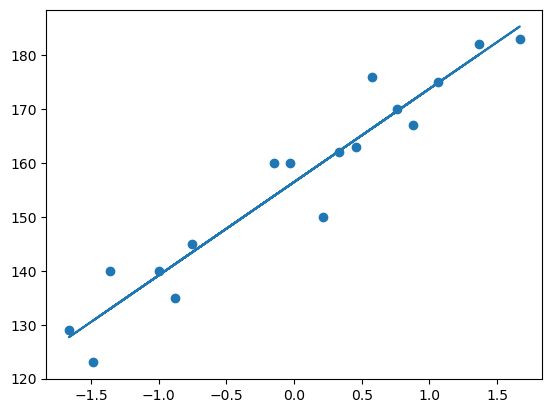

In [17]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regession.predict(X_train))

best fit line with less error


## predictor for test data
1. predicted height output=intercept+coef_(weight)
2. y_pred=regression.predict(X_test)


In [18]:
y_pred=regession.predict(X_test)

## performance metrics

In [19]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [20]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.665125886795005
10.716374991212605


values mse is pinelizing as not robust to outliers and give high error
where as value of mae if robut to outliers

R square
r^2=ssr/sst


In [21]:
from sklearn.metrics import r2_score

In [22]:
score=r2_score(y_test,y_pred)
print(score)

0.7360826717981276


observations: 73% accuracy

## OLS linear regression

In [23]:
import statsmodels.api as sm

In [24]:
model=sm.OLS(y_train,X_train).fit()

In [25]:
prediction=model.predict(X_test)
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [26]:
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Sun, 25 Aug 2024   Prob (F-statistic):                       0.664
Time:                        17:57:18   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\chetan\miniconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


here the value of x1 = 17.2982 same with the coefficent value of model with ols

## prediction for new data

In [27]:
regession.predict(scaler.transform([[102]]))

c:\Users\chetan\miniconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([187.41519785])

predicted height of person with weight 102 kgs is 187.41 cm